# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

647

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
# Create a settings dictionary with your API key and preferred units
log = open("./output_data/log.txt","w")

count = 1
weatherData = []

for city in cities:
   
    try:
        weatherData.append(owm.get_current(city, **settings))

        # Include a print log of each city as it's being processed with the city number and city name.
        log.write(f'Processing Record n {count}. City: {city}.\n')
    
    except:

        log.write(f'Processing Record n {count}. City: {city} not found.\n')
    
    count = count + 1

    
log.close() 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df_weatherData = pd.DataFrame(weatherData) 
df_weatherData.head()

,coord,weather,base,main,wind,rain,clouds,dt,sys,timezone,id,name,cod,visibility,snow
0,"{'lon': -54.38, 'lat': 4.27}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 23.42, 'pressure': 1009, 'humidity': ...","{'speed': 1.01, 'deg': 37}",{'3h': 2.19},{'all': 59},1574377730,"{'country': 'GF', 'sunrise': 1574328369, 'suns...",-10800,3381538,Grand-Santi,200,NaN,NaN
1,"{'lon': -60.28, 'lat': -38.38}","[{'id': 500, 'main': 'Rain', 'description': 'l...",model,"{'temp': 12.97, 'pressure': 1013, 'humidity': ...","{'speed': 5.2, 'deg': 182}",{'3h': 0.56},{'all': 66},1574378283,"{'country': 'AR', 'sunrise': 1574325348, 'suns...",-10800,3833859,Tres Arroyos,200,NaN,NaN
2,"{'lon': 50.28, 'lat': -14.9}","[{'id': 800, 'main': 'Clear', 'description': '...",model,"{'temp': 26.77, 'pressure': 1012, 'humidity': ...","{'speed': 4.47, 'deg': 32}",NaN,{'all': 0},1574378283,"{'country': 'MG', 'sunrise': 1574387946, 'suns...",10800,1071296,Antalaha,200,NaN,NaN
3,"{'lon': 96.39, 'lat': 61.68}","[{'id': 804, 'main': 'Clouds', 'description': ...",model,"{'temp': -24.94, 'pressure': 1022, 'humidity':...","{'speed': 0.99, 'deg': 222}",NaN,{'all': 96},1574378283,"{'country': 'RU', 'sunrise': 1574388042, 'suns...",25200,1510689,Baykit,200,NaN,NaN
4,"{'lon': 149.07, 'lat': -23.58}","[{'id': 802, 'main': 'Clouds', 'description': ...",model,"{'temp': 26.55, 'pressure': 1017, 'humidity': ...","{'speed': 4.34, 'deg': 69}",NaN,{'all': 40},1574378283,"{'country': 'AU', 'sunrise': 1574363363, 'suns...",36000,2175403,Bluff,200,NaN,NaN


In [6]:
df_weatherData.count()

coord         578
weather       578
base          578
main          578
wind          578
rain           77
clouds        578
dt            578
sys           578
timezone      578
id            578
name          578
cod           578
visibility    254
snow           19
dtype: int64

In [14]:
data_fields = []
for index, data in df_weatherData.iterrows():
    fields = {
        'City': data['name'],
        'Cloudiness' : data['clouds']['all'],
        'Country' : data['sys']['country'],
        'Date': data['dt'],
        'Humidity': data['main']['humidity'],
        'Lat': data['coord']['lat'],
        'Lng': data['coord']['lon'],
        'Max Temp': data['main']['temp_max'],
        'Wind Speed': data['wind']['speed']
    }
    
    data_fields.append(fields)

df_weather = pd.DataFrame(data_fields)
df_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Grand-Santi,59,GF,1574377730,94,4.27,-54.38,23.42,1.01
1,Tres Arroyos,66,AR,1574378283,85,-38.38,-60.28,12.97,5.20
2,Antalaha,0,MG,1574378283,82,-14.90,50.28,26.77,4.47
3,Baykit,96,RU,1574378283,97,61.68,96.39,-24.94,0.99
4,Bluff,40,AU,1574378283,45,-23.58,149.07,26.55,4.34


In [24]:
df_weather.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

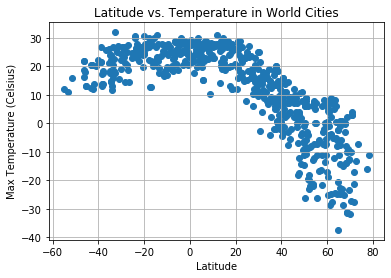

In [27]:
# Build a scatter plot for each data type
plt.scatter(df_weather["Lat"], df_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Temperature in World Cities")
plt.ylabel("Max Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/TemperatureInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

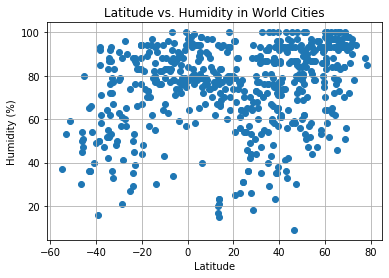

In [25]:
# Build a scatter plot for each data type
plt.scatter(df_weather["Lat"], df_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

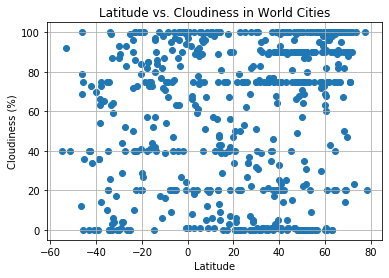

In [26]:
# Build a scatter plot for each data type
plt.scatter(df_weather["Lat"], df_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

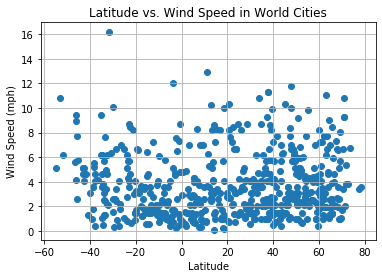

In [28]:
# Build a scatter plot for each data type
plt.scatter(df_weather["Lat"], df_weather["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("./output_data/WindSpeedInWorldCities.png")

# Show plot
plt.show()

# Observations

- Is it possible to observe an outlier when analyzing Wind Speed, for a city in south hemisphere called San Juan, Argentina;
- Clearly there is a relationship between latitude and temperature, as temperatures are typically warmer approaching the Equator and cooler approaching the Poles;
- Humidity appears to be mostly regular across latitudes, though with an absence of lower humidity values near the equator and Arctic. 